# First

In [6]:
import numpy as np
from itertools import combinations, product
#from scipy.sparse import csr_matrix

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

dim = 3 # Qudit dimension

In [3]:
def modadd(state, Z_or_X, index):
    if state[Z_or_X][index] == dim-1:
        state[Z_or_X][index]=0
    else:
        state[Z_or_X][index]+=1
    return state

def evolution(state, size):
    Z_part, X_part = state
    new_state = [[0 for _ in range(size)],[0 for _ in range(size)]]
    # X to Z evolution
    for i in range(size):
        for k in range(X_part[i]):
            # Z
            new_state = modadd(new_state, 0, i)
            new_state = modadd(new_state, 0, i)
            #new_state = modadd(new_state, 0, i) #4
    # Z evolution
    for i in range(size):
        for k in range(Z_part[i]):
            if i == 0: # Boundary
                # Z
                new_state = modadd(new_state, 0, i)
                new_state = modadd(new_state, 0, i)
                #new_state = modadd(new_state, 0, i)#4
                new_state = modadd(new_state, 0, i+1)
                new_state = modadd(new_state, 0, i+1)
                #new_state = modadd(new_state, 0, i+1)#4
                # X
                new_state = modadd(new_state, 1, i)
            elif i < size-1:
                # Z
                new_state = modadd(new_state, 0, i-1)
                new_state = modadd(new_state, 0, i-1)
                #new_state = modadd(new_state, 0, i-1)#4
                new_state = modadd(new_state, 0, i)
                new_state = modadd(new_state, 0, i)
                #new_state = modadd(new_state, 0, i)#4
                new_state = modadd(new_state, 0, i+1)
                new_state = modadd(new_state, 0, i+1)
                #new_state = modadd(new_state, 0, i+1)#4
                # X
                new_state = modadd(new_state, 1, i)
            else:
                # Z
                new_state = modadd(new_state, 0, i-1)
                new_state = modadd(new_state, 0, i-1)
                #new_state = modadd(new_state, 0, i-1)#4
                new_state = modadd(new_state, 0, i)
                new_state = modadd(new_state, 0, i)
                #new_state = modadd(new_state, 0, i)#4
                # X
                new_state = modadd(new_state, 1, i) 
    return new_state

In [4]:
# Creating initial state

upper_bound = 300 # Cutoff for O_k size

for k in range(80, 81):
    Z = list(np.zeros((k,), dtype=int))
    Z[0] = 1
    X = list(np.zeros((k,), dtype=int))


    state_0=[Z, X]

    size = len(state_0[0])

    state = evolution(state_0, size)

    all_states = [state_0]

    while state != state_0 and len(all_states)<upper_bound: # Stop when return to initial, cutoff size
        all_states.append(state)
        state = evolution(state, size)
    print(k, len(all_states))


# 32 -> 732
# 35 -> 540
# 38 -> 1092
# 44 -> 360
# 53 -> 324
# 62 -> 3276
# 71 -> 2160
# 77 -> 3276
# 98 -> 2196
# 107 -> 1620
# 116 -> 3276
# 161 -> 972

# 26 -> 108
# 80 -> 324
# 242 -> 972

80 300


NameError: name 'sns' is not defined

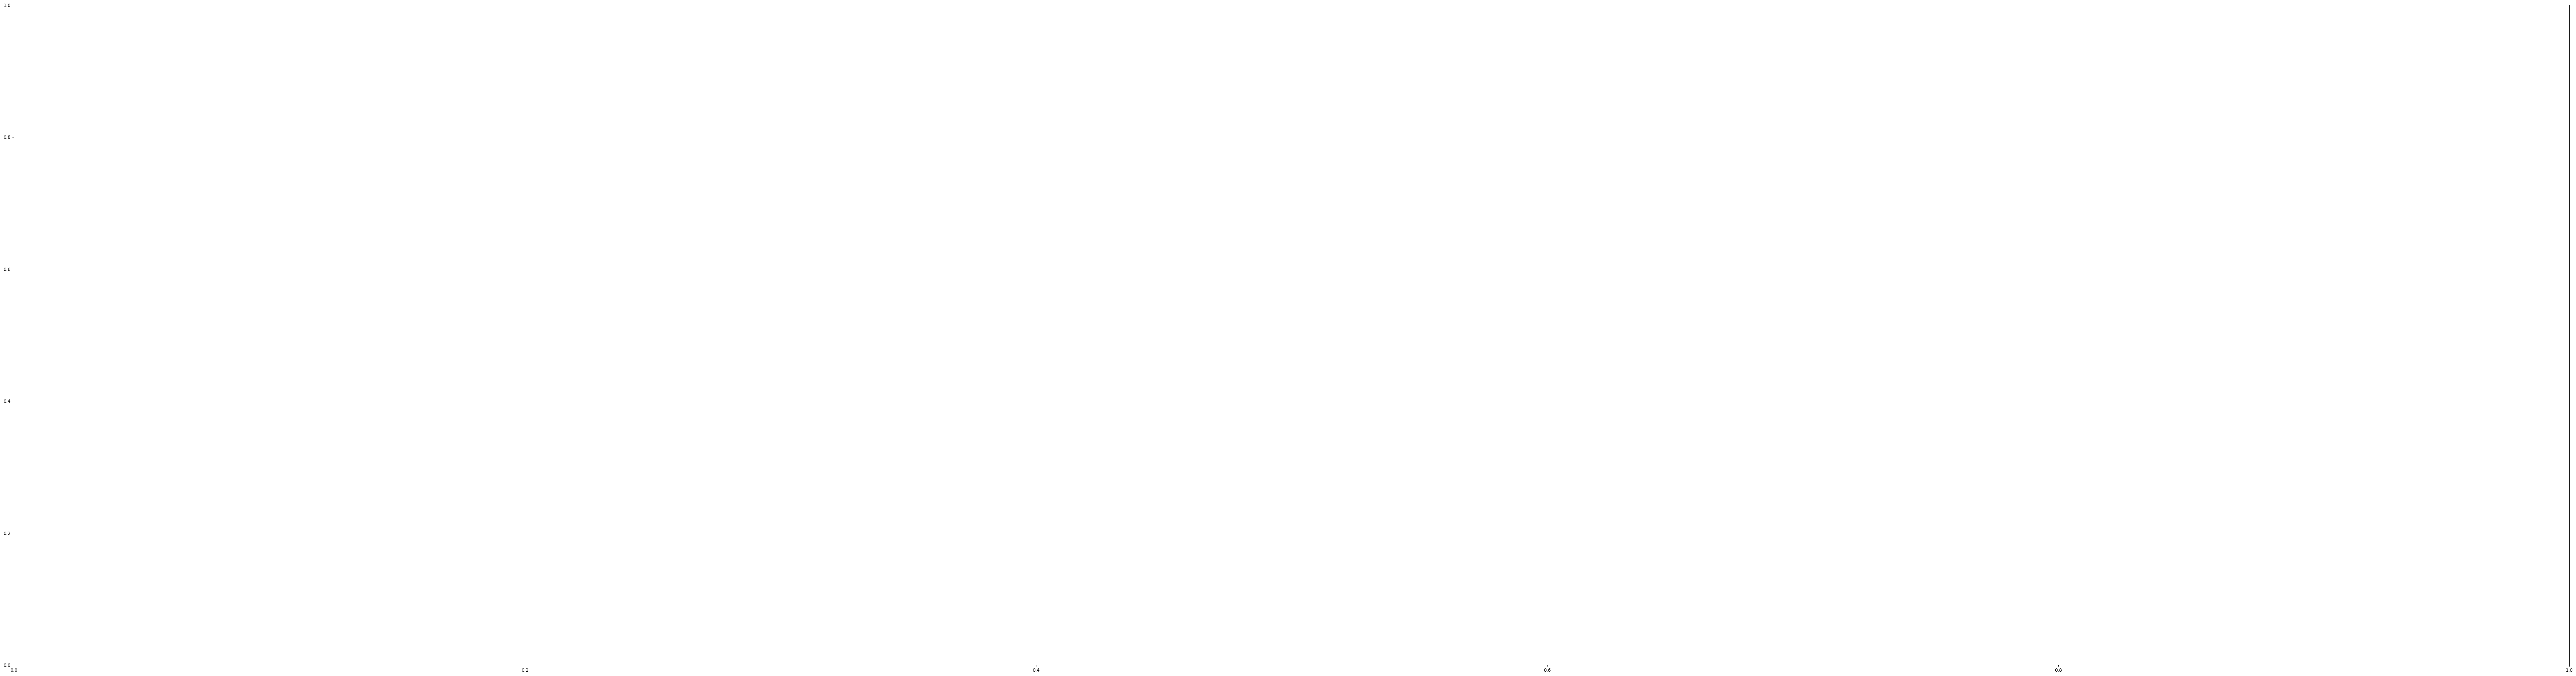

In [5]:
scale = 1/3
fig, ax = plt.subplots(figsize=(int(scale*len(all_states)), int(scale*size)))   

to_plot = []
r
for i in all_states:
    to_add = []
    j, k = i
    for l in range(len(j)):
        to_add.append(3*j[l]+k[l])
    to_plot.append(to_add)
    
to_plot = np.transpose(np.array(to_plot))

hm = sns.heatmap(data=to_plot, cmap="viridis", ax=ax, yticklabels=False, xticklabels=False, cbar=False)
# displaying the plotted heatmap
plt.show()

# sierpinski carpet/diamond


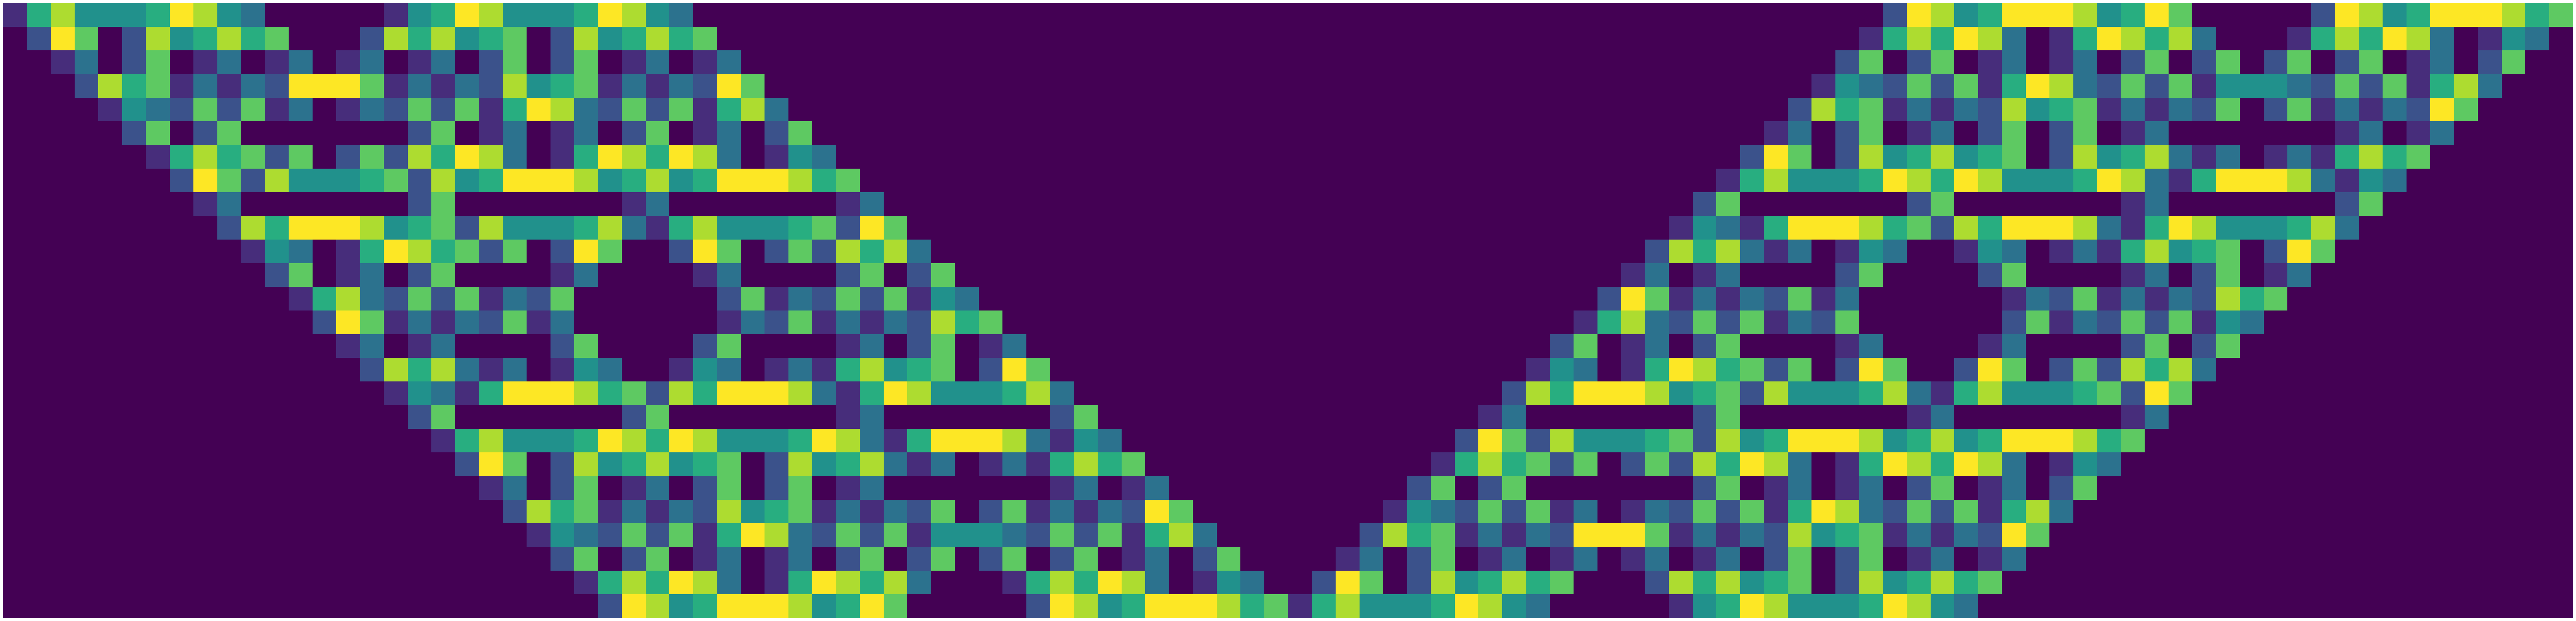

In [8]:
fig, ax = plt.subplots(figsize=(len(all_states), size))   

to_plot = []

for i in all_states:
    to_add = []
    j, k = i
    for l in range(len(j)):
        to_add.append(j[l]+dim*k[l])
    to_plot.append(to_add)
    
to_plot = np.transpose(np.array(to_plot))

hm = sns.heatmap(data=to_plot, cmap="viridis", ax=ax, yticklabels=False, xticklabels=False, cbar=False)
# displaying the plotted heatmap
plt.show()


size = 14, 26

# Qubit

In [2]:
import numpy as np
from itertools import combinations, product
#from scipy.sparse import csr_matrix

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

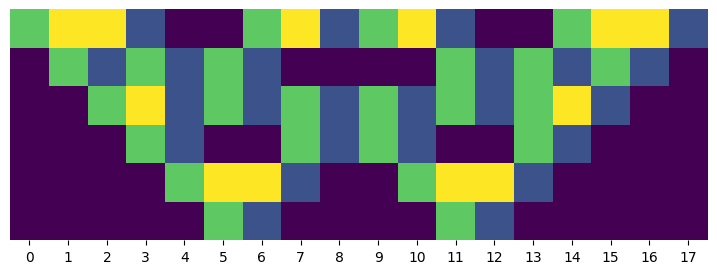

In [24]:
dim = 2

def modadd(state, Z_or_X, index):
    if state[Z_or_X][index] == dim-1:
        state[Z_or_X][index]=0
    else:
        state[Z_or_X][index]+=1
    return state

def evolution(state, size):
    Z_part, X_part = state
    new_state = [[0 for _ in range(size)],[0 for _ in range(size)]]
    # X to Z evolution
    for i in range(size):
        for k in range(X_part[i]):
            # Z
            new_state = modadd(new_state, 0, i)
    # Z evolution
    for i in range(size):
        for k in range(Z_part[i]):
            if i == 0: # Boundary
                # Z
                new_state = modadd(new_state, 0, i)
                new_state = modadd(new_state, 0, i+1)
                # X
                new_state = modadd(new_state, 1, i)
            elif i < size-1:
                # Z
                new_state = modadd(new_state, 0, i-1)
                new_state = modadd(new_state, 0, i)
                new_state = modadd(new_state, 0, i+1)
                # X
                new_state = modadd(new_state, 1, i)
            else:
                # Z
                new_state = modadd(new_state, 0, i-1)
                new_state = modadd(new_state, 0, i)
                # X
                new_state = modadd(new_state, 1, i) 
    return new_state

# Creating initial state

upper_bound = 200 # Cutoff for O_k size

k = 6

Z = list(np.zeros((k,), dtype=int))
Z[0] = 1
X = list(np.zeros((k,), dtype=int))


state_0=[Z, X]

size = len(state_0[0])

state = evolution(state_0, size)

all_states = [state_0]

while state != state_0 and len(all_states)<upper_bound: # Stop when return to initial, cutoff size
    all_states.append(state)
    state = evolution(state, size)

scale = 0.5
fig, ax = plt.subplots(figsize=(int(scale*len(all_states)), int(scale*size)))   

to_plot = []

for i in all_states:
    to_add = []
    j, k = i
    for l in range(len(j)):
        to_add.append(3*j[l]+k[l])
    to_plot.append(to_add)

to_plot = np.transpose(np.array(to_plot))

hm = sns.heatmap(data=to_plot, cmap="viridis", ax=ax, yticklabels=False, cbar=False)
# displaying the plotted heatmap
plt.show()

# sierpinski carpet/diamond


In [25]:
to_check = all_states[0], all_states[1], all_states[2],\
all_states[4], all_states[5], all_states[6],\
all_states[8],\
all_states[-10],\
all_states[-8], all_states[-7], all_states[-6],\
all_states[-4], all_states[-3], all_states[-2], all_states[-1],\
all_states[3], all_states[-5], all_states[7], all_states[-9]

# K = 6
"""
to_check = all_states[0], all_states[1], all_states[2],\
all_states[4], all_states[5], all_states[6],\
all_states[-6],all_states[-7],\
all_states[-4], all_states[-3], all_states[-2], all_states[-1],\
all_states[3], all_states[7]
"""

In [27]:
to_check

([[0, 1, 1, 1, 0, 0], [1, 0, 1, 0, 0, 0]],
 [[0, 0, 0, 0, 1, 0], [0, 1, 1, 1, 0, 0]],
 [[0, 1, 1, 0, 1, 1], [0, 0, 0, 0, 1, 0]],
 [[1, 0, 1, 0, 0, 0], [0, 1, 1, 1, 0, 0]],
 [[0, 1, 1, 1, 0, 0], [0, 0, 0, 0, 1, 0]],
 [[0, 0, 0, 0, 1, 0], [0, 1, 1, 0, 1, 1]])

In [28]:
"""for i, j in to_check:
    str_len = len(i)
    fourths = int(str_len/4)
    for k in range(fourths):
        i.pop(4*k+3-k)
        j.pop(4*k+3-k)
to_check"""

for i, j in to_check:
    str_len = len(i)
    for k in range(str_len-3):
        i.pop(0)
        j.pop(0)
to_check

([[1, 0, 0], [0, 0, 0]],
 [[0, 1, 0], [1, 0, 0]],
 [[0, 1, 1], [0, 1, 0]],
 [[0, 0, 0], [1, 0, 0]],
 [[1, 0, 0], [0, 1, 0]],
 [[0, 1, 0], [0, 1, 1]])

# More

In [12]:
ortho = tuple([(tuple(i[0]), tuple(i[1])) for i in to_check]) # vectorised collection of all_states
# ortho = A_k as output

ortho_str = [''.join([str(elem) for elem in to_check[i][0]])\
 +''.join([str(elem) for elem in to_check[i][1]])for i in range(len(to_check))] # String rep.
# allows us to generate the indexes

new_ortho = [] # Allows us to detect wether commutation generate new Pauli matrices
# Will reduce combination size

size = len(to_check[0][0]) # Qudit count
new_length = len(ortho)

possible_decimal = [0 for i in range((dim**2)**size)] # List of all possible indexes of
# Pauli matrices. Value = 1 at some index meaning that specific Pauli matrix
# is contained in ortho

for i in ortho_str: # Set = 1 for pauli matrices in initial ortho
    ortho_index  = int(i, dim)
    if possible_decimal[ortho_index] == 0:
        possible_decimal[ortho_index] = 1

        
loop = True

while loop == True:
    comb1 = list(combinations([i for i in range(new_length)], 2))
    list1 = [i for i in range(new_length)]
    list2 = [i for i in range(new_length, len(ortho))]
    comb2 = list(product(list1,list2))
    total_comb = comb1 + comb2 # Desired combinations to generate commutations
    print("Length: ", len(total_comb), " list1: ", len(list1)\
         , " list2: ", len(list2))
    for i1, i2 in total_comb: # Iterate over desired comb.
        M1 = ortho[i1]
        M2 = ortho[i2]
        conj = [[0 for k in range(size)],[0 for k in range(size)]] #Z,X
        count = 0
        for i in range(size):
            # Below commutation based on notes
            a, b, c, d = M1[0][i], M1[1][i], M2[0][i], M2[1][i]
            Z_c = (a+c)%dim
            X_c = (b+d)%dim
            count += -b*c+d*a
            conj[0][i] = Z_c
            conj[1][i] = X_c
        if count%dim != 0: # equals 0 means [M1, M2] = 0
            conj = (tuple(conj[0]), tuple(conj[1]))
            conj_str = ''.join([str(elem) for elem in conj[0]])\
            +''.join([str(elem) for elem in conj[1]]) # Get hexadecimal rep. of vector
            conj_index = int(conj_str, dim) # Index of Pauli, convert from dim rep. to decimal
            if possible_decimal[conj_index] == 0: # Checks if ortho contains Pauli
                new_ortho.append(conj)
                possible_decimal[conj_index] = 1
                if (len(new_ortho)+len(ortho))%10000==0:
                    print(len(new_ortho)+len(ortho))
    if len(new_ortho) == 0: # If no new matrices generated from commutation, exit
        loop = False
        new_length = len(new_ortho)
    print('ortho: ', len(ortho), 'new: ', len(new_ortho))
    new_length = 30
    ortho = tuple(new_ortho) + ortho
    new_ortho = []
    #new_length =  # change to make faster, will be extremely large if len(new_ortho)

print(len(ortho))

Length:  153  list1:  18  list2:  0
ortho:  18 new:  90
Length:  2775  list1:  30  list2:  78
ortho:  108 new:  619
Length:  21345  list1:  30  list2:  697
ortho:  727 new:  2094
Length:  84165  list1:  30  list2:  2791
ortho:  2821 new:  1267
Length:  122175  list1:  30  list2:  4058
ortho:  4088 new:  7
Length:  122385  list1:  30  list2:  4065
ortho:  4095 new:  0
4095


In [13]:
4**9-1

262143

In [14]:
count_x = 0
count_y = 0
count_i = 0
count_z = 0

ortho_X = []

ortho_I = []
for i in ortho:
    Z_1, X_1 = i
    if Z_1[3] == 0 and X_1[3] == 0:
        count_i += 1
        ortho_I.append(i)
    elif Z_1[3] == 0 and X_1[3] == 1:
        count_x += 1
        ortho_X.append(i)
    elif Z_1[3] == 1 and X_1[3] == 0:
        count_z += 1
    else:
        count_y += 1
print('X = ', count_x)
print('Y = ', count_y)
print('Z = ', count_z)
print('I = ', count_i)

X =  1024
Y =  1024
Z =  1024
I =  1023


In [15]:
anti_commutes = 0
commutes = 0
M1 = all_states[13]

for M2 in ortho:
    count = 0
    for i in range(size):
        a, b, c, d = M1[0][i], M1[1][i], M2[0][i], M2[1][i]
        Z_c = (a+c)%dim
        X_c = (b+d)%dim
        count += -b*c+d*a
    if count%dim != 0:
        anti_commutes += 1
    else:
        commutes += 1
print("Anti Commutes = ", anti_commutes, ", Commutes = ", commutes)


Anti Commutes =  2048 , Commutes =  2047


In [ ]:
[A, B] = X

[A, A] = 0

[AB, A] = ABA - AAB = A[B, A] = -A[B, A] = -AX


commute: ZZ, XX, YY, XI, IX, YZ, ZY, (II)

anti-commute: XZ, XY, ZX, YX, IZ, IY, ZI, YI


Need to know the fact that paulis commute with precisely half of others in Pauli group?


Starting with subset O_K we call the proof subset, we know that the fourth qubit will either be I or X. Commuting these elements with all_states 3, 7, 9 ,13 gives us the following results:

3 anti-commutes with all

7 commutes with all

9 anti-commutes with all

13 commutes with all


The viable pairs which give universality are:
3, 7
3, 13
9, 7
9, 13

Which means that we must commuting and anti-commuting pairs


Choosing 3, 9 will generate A_K of size 2046. Then, states 7 and 13 will anti-commute with precisely half of them (1023). Likewise, we know that the square of the states also anti-commute with the given half. Summing up basically gives us the desired 4095

We know that $T_k Z T_k^\dagger$ anti-commutes with $Z$. By induction, this implies $T_k^{a} Z \left(T_k^\dagger\right)^{a}$ anti-commutes with $T_k^{a+1} Z \left(T_k^\dagger\right)^{a+1}$

# More

In [373]:
"""index_comb = list(combinations([i for i in range(len(all_states)) if i not in\
                          [0, 1, 2, 4, 5, 6, len(all_states)-1, len(all_states)-2, len(all_states)-3, len(all_states)-4,\
                     len(all_states)-6, len(all_states)-7, len(all_states)-8]], 2))"""


index_comb = list(combinations([i for i in range(len(all_states)) if i not in [0, 1, 2, 4, 5, 6, 10, 11, 12, 14, 15, 16, 17]], 2))


for t_1, t_2 in index_comb:
    # Not 7, 8
    to_check = all_states[0], all_states[1], all_states[2],\
    all_states[4], all_states[5], all_states[6],\
    all_states[10], all_states[11], all_states[12],\
    all_states[14], all_states[15], all_states[16], all_states[17],\
    all_states[t_1], all_states[t_2]

    ortho = tuple([(tuple(i[0]), tuple(i[1])) for i in to_check]) # vectorised collection of all_states
    # ortho = A_k as output
    
    ortho_str = [''.join([str(elem) for elem in to_check[i][0]])\
     +''.join([str(elem) for elem in to_check[i][1]])for i in range(len(to_check))] # String rep.
    # allows us to generate the indexes
    
    new_ortho = [] # Allows us to detect wether commutation generate new Pauli matrices
    # Will reduce combination size
    
    size = len(to_check[0][0]) # Qudit count
    new_length = len(ortho)
    
    possible_decimal = [0 for i in range((dim**2)**size)] # List of all possible indexes of
    # Pauli matrices. Value = 1 at some index meaning that specific Pauli matrix
    # is contained in ortho
    
    for i in ortho_str: # Set = 1 for pauli matrices in initial ortho
        ortho_index  = int(i, dim)
        if possible_decimal[ortho_index] == 0:
            possible_decimal[ortho_index] = 1
    
            
    loop = True
    
    while loop == True:
        comb1 = list(combinations([i for i in range(new_length)], 2))
        list1 = [i for i in range(new_length)]
        list2 = [i for i in range(new_length, len(ortho))]
        comb2 = list(product(list1,list2))
        total_comb = comb1 + comb2 # Desired combinations to generate commutations
        for i1, i2 in total_comb: # Iterate over desired comb.
            M1 = ortho[i1]
            M2 = ortho[i2]
            conj = [[0 for k in range(size)],[0 for k in range(size)]] #Z,X
            count = 0
            for i in range(size):
                # Below commutation based on notes
                a, b, c, d = M1[0][i], M1[1][i], M2[0][i], M2[1][i]
                Z_c = (a+c)%dim
                X_c = (b+d)%dim
                count += -b*c+d*a
                conj[0][i] = Z_c
                conj[1][i] = X_c
            if count%dim != 0: # equals 0 means [M1, M2] = 0
                conj = (tuple(conj[0]), tuple(conj[1]))
                conj_str = ''.join([str(elem) for elem in conj[0]])\
                +''.join([str(elem) for elem in conj[1]]) # Get hexadecimal rep. of vector
                conj_index = int(conj_str, dim) # Index of Pauli, convert from dim rep. to decimal
                if possible_decimal[conj_index] == 0: # Checks if ortho contains Pauli
                    new_ortho.append(conj)
                    possible_decimal[conj_index] = 1
        if len(new_ortho) == 0: # If no new matrices generated from commutation, exit
            loop = False
            new_length = len(new_ortho)
        new_length = 20
        ortho = tuple(new_ortho) + ortho
        new_ortho = []
        #new_length =  # change to make faster, will be extremely large if len(new_ortho)
    if len(ortho) > 1000:
        print(t_1, ' ', t_2, ' ', len(ortho))

3   7   4095
3   8   2046
3   9   2046
3   13   4095
7   8   2046
7   9   4095
7   13   2046
8   9   2046
8   13   2046
9   13   4095


# Universality Proof June 11

In [1]:
import numpy as np
from itertools import combinations, product
#from scipy.sparse import csr_matrix

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
dim = 2

def modadd(state, Z_or_X, index):
    if state[Z_or_X][index] == dim-1:
        state[Z_or_X][index]=0
    else:
        state[Z_or_X][index]+=1
    return state

def evolution(state, size):
    Z_part, X_part = state
    new_state = [[0 for _ in range(size)],[0 for _ in range(size)]]
    # X to Z evolution
    for i in range(size):
        for k in range(X_part[i]):
            # Z
            new_state = modadd(new_state, 0, i)
    # Z evolution
    for i in range(size):
        for k in range(Z_part[i]):
            if i == 0: # Boundary
                # Z
                new_state = modadd(new_state, 0, i)
                new_state = modadd(new_state, 0, i+1)
                # X
                new_state = modadd(new_state, 1, i)
            elif i < size-1:
                # Z
                new_state = modadd(new_state, 0, i-1)
                new_state = modadd(new_state, 0, i)
                new_state = modadd(new_state, 0, i+1)
                # X
                new_state = modadd(new_state, 1, i)
            else:
                # Z
                new_state = modadd(new_state, 0, i-1)
                new_state = modadd(new_state, 0, i)
                # X
                new_state = modadd(new_state, 1, i) 
    return new_state

# Creating initial state

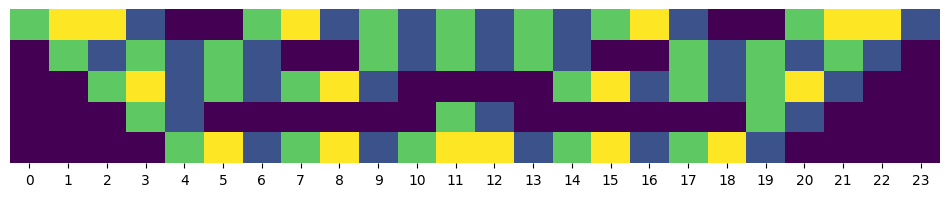

In [4]:
# Creating initial state

upper_bound = 200 # Cutoff for O_k size

k = 5

Z = list(np.zeros((k,), dtype=int))
Z[0] = 1
X = list(np.zeros((k,), dtype=int))


state_0=[Z, X]

size = len(state_0[0])

state = evolution(state_0, size)

all_states = [state_0]

while state != state_0 and len(all_states)<upper_bound: # Stop when return to initial, cutoff size
    all_states.append(state)
    state = evolution(state, size)

scale = 0.5
fig, ax = plt.subplots(figsize=(int(scale*len(all_states)), int(scale*size)))   

to_plot = []

for i in all_states:
    to_add = []
    a, b = i
    for l in range(len(a)):
        to_add.append(3*a[l]+b[l])
    to_plot.append(to_add)

to_plot = np.transpose(np.array(to_plot))

hm = sns.heatmap(data=to_plot, cmap="viridis", ax=ax, yticklabels=False, cbar=False)
# displaying the plotted heatmap
plt.show()

# sierpinski carpet/diamond


In [71]:
# Inductive step

to_check = []
for i in range(3):
    to_check.append(all_states[k-i-1])
    to_check.append(all_states[-k+i])
to_check

[[[1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1],
  [1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0]],
 [[1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0],
  [1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1]],
 [[1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0],
  [1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]],
 [[1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
  [1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0]],
 [[1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
  [0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0]],
 [[0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0],
  [1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]]]

In [72]:
for i, j in to_check:
    str_len = len(i)
    for k in range(str_len-3):
        i.pop(0)
        j.pop(0)
to_check

[[[1, 0, 1], [1, 1, 0]],
 [[1, 1, 0], [1, 0, 1]],
 [[1, 1, 0], [1, 0, 0]],
 [[1, 0, 0], [1, 1, 0]],
 [[1, 0, 0], [0, 0, 0]],
 [[0, 0, 0], [1, 0, 0]]]

In [69]:
# Modified so it is only multiplicative, not commutative


ortho = tuple([(tuple(i[0]), tuple(i[1])) for i in to_check]) # vectorised collection of all_states
# ortho = A_k as output

ortho_str = [''.join([str(elem) for elem in to_check[i][0]])\
 +''.join([str(elem) for elem in to_check[i][1]])for i in range(len(to_check))] # String rep.
# allows us to generate the indexes

new_ortho = [] # Allows us to detect wether commutation generate new Pauli matrices
# Will reduce combination size

size = len(to_check[0][0]) # Qudit count
new_length = len(ortho)

possible_decimal = [0 for i in range((dim**2)**size)] # List of all possible indexes of
# Pauli matrices. Value = 1 at some index meaning that specific Pauli matrix
# is contained in ortho

for i in ortho_str: # Set = 1 for pauli matrices in initial ortho
    ortho_index  = int(i, dim)
    if possible_decimal[ortho_index] == 0:
        possible_decimal[ortho_index] = 1

        
loop = True

while loop == True:
    comb1 = list(combinations([i for i in range(new_length)], 2))
    list1 = [i for i in range(new_length)]
    list2 = [i for i in range(new_length, len(ortho))]
    comb2 = list(product(list1,list2))
    total_comb = comb1 + comb2 # Desired combinations to generate commutations
    print("Length: ", len(total_comb), " list1: ", len(list1)\
         , " list2: ", len(list2))
    for i1, i2 in total_comb: # Iterate over desired comb.
        M1 = ortho[i1]
        M2 = ortho[i2]
        conj = [[0 for k in range(size)],[0 for k in range(size)]] #Z,X
        for i in range(size):
            # Below commutation based on notes
            a, b, c, d = M1[0][i], M1[1][i], M2[0][i], M2[1][i]
            Z_c = (a+c)%dim
            X_c = (b+d)%dim
            conj[0][i] = Z_c
            conj[1][i] = X_c
        conj = (tuple(conj[0]), tuple(conj[1]))
        conj_str = ''.join([str(elem) for elem in conj[0]])\
        +''.join([str(elem) for elem in conj[1]]) # Get hexadecimal rep. of vector
        conj_index = int(conj_str, dim) # Index of Pauli, convert from dim rep. to decimal
        if possible_decimal[conj_index] == 0: # Checks if ortho contains Pauli
            new_ortho.append(conj)
            possible_decimal[conj_index] = 1
            if (len(new_ortho)+len(ortho))%10000==0:
                print(len(new_ortho)+len(ortho))
    if len(new_ortho) == 0: # If no new matrices generated from commutation, exit
        loop = False
        new_length = len(new_ortho)
    print('ortho: ', len(ortho), 'new: ', len(new_ortho))
    new_length = len(new_ortho)
    ortho = tuple(new_ortho) + ortho
    new_ortho = []
    #new_length =  # change to make faster, will be extremely large if len(new_ortho)

print(len(ortho))

Length:  15  list1:  6  list2:  0
ortho:  6 new:  3
Length:  21  list1:  3  list2:  6
ortho:  9 new:  1
Length:  9  list1:  1  list2:  9
ortho:  10 new:  0
10


In [35]:
4**3-1

63

In [ ]:
bruh bruh bruh bruh bruh bruh bruh bruh bruh bruh bruh that is osme weird shit bruh that is not at all aligned to the goals of the institution which are to conceive the strangest beings in the entire universe which do not at all belong to the alright benders in the moon who do not have the best words in the world to describe our predicament in this situation and that is going to be one of the worst things in the world to check upon once you see that miles morales is not 